In [1]:
# Import libraries
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# increase the size and quality of any plots we produce
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 150

In [2]:
# load file
county_sum = pd.read_csv("https://raw.githubusercontent.com/mellanyquiroz/DS4A-TeamProject/master/data/Merged_deaths_hospital_availability_by_county.csv", index_col="COUNTY")
county_sum.head()

,Unnamed: 0,TOTAL_FAC,TOTAL_NUMBER_BEDS,COUNT_NOER_FAC,COUNT_ER_FAC,ER_BEDS,TOTALFAC_PER_POP,TOTALBEDS_PER_POP,ERFAC_PER_POP,ERBEDS_PER_POP,ERFAC_PER_AREA,DEATHRATES19,DEATHCOUNTS19,DEATHRATES20,DEATHCOUNTS20,COUNTS_GR19,COUNTS_GR20
COUNTY,,,,,,,,,,,,,,,,,
Los Angeles,0,3781,65542,3708,72,20947,37.925635,657.424487,0.722202,210.110627,0.017742,6.70,707.0,12.40,1300.0,42.253521,83.875530
San Bernardino,1,483,10940,464,19,4079,21.887391,495.751671,0.860995,184.841962,0.000947,6.10,133.0,12.95,288.0,25.471698,116.541353
Orange,2,482,14362,456,26,5968,15.180481,452.327936,0.818864,187.960808,0.032878,8.13,272.0,15.45,503.0,7.936508,84.926471
San Diego,3,421,16456,403,18,6260,12.577414,491.624518,0.537752,187.018077,0.004279,8.92,314.0,15.14,528.0,17.164179,68.152866
Alameda,4,340,9074,327,13,2894,20.232315,539.964772,0.773588,172.212701,0.017589,5.75,103.0,8.09,144.0,83.928571,39.805825


In [3]:
# remove "Unnamed: 0"
county_sum = county_sum.drop(columns="Unnamed: 0")

In [4]:
# Check data types
county_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, Los Angeles to Mono
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TOTAL_FAC          57 non-null     int64  
 1   TOTAL_NUMBER_BEDS  57 non-null     int64  
 2   COUNT_NOER_FAC     57 non-null     int64  
 3   COUNT_ER_FAC       57 non-null     int64  
 4   ER_BEDS            57 non-null     int64  
 5   TOTALFAC_PER_POP   57 non-null     float64
 6   TOTALBEDS_PER_POP  57 non-null     float64
 7   ERFAC_PER_POP      57 non-null     float64
 8   ERBEDS_PER_POP     57 non-null     float64
 9   ERFAC_PER_AREA     57 non-null     float64
 10  DEATHRATES19       57 non-null     float64
 11  DEATHCOUNTS19      57 non-null     float64
 12  DEATHRATES20       57 non-null     float64
 13  DEATHCOUNTS20      57 non-null     float64
 14  COUNTS_GR19        54 non-null     float64
 15  COUNTS_GR20        57 non-null     float64
dtypes: float64(11), int64

In [10]:
county_sum = county_sum.fillna(0)
county_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, Los Angeles to Mono
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TOTAL_FAC          57 non-null     int64  
 1   TOTAL_NUMBER_BEDS  57 non-null     int64  
 2   COUNT_NOER_FAC     57 non-null     int64  
 3   COUNT_ER_FAC       57 non-null     int64  
 4   ER_BEDS            57 non-null     int64  
 5   TOTALFAC_PER_POP   57 non-null     float64
 6   TOTALBEDS_PER_POP  57 non-null     float64
 7   ERFAC_PER_POP      57 non-null     float64
 8   ERBEDS_PER_POP     57 non-null     float64
 9   ERFAC_PER_AREA     57 non-null     float64
 10  DEATHRATES19       57 non-null     float64
 11  DEATHCOUNTS19      57 non-null     float64
 12  DEATHRATES20       57 non-null     float64
 13  DEATHCOUNTS20      57 non-null     float64
 14  COUNTS_GR19        57 non-null     float64
 15  COUNTS_GR20        57 non-null     float64
dtypes: float64(11), int64

The national average per 1,000 U.S. residents was 2.4 hospital beds. Here we would create a new categorical variable: hospital beds per 1000 population by county and determine whether it is above or below national average. We say the density is "Low" if it is below national average, and "High" if it is above national average.

In [16]:
# TOTALBEDS_PER_POP is number of hospital beds per 100K residents
county_sum["BED_DENSITY"] = county_sum["TOTALBEDS_PER_POP"]/100

In [18]:
bed_density_list = []
for i in list(county_sum["BED_DENSITY"]):
    if i < 2.4:
        bed_density_list.append("Low")
    else:
        bed_density_list.append("High")
print(bed_density_list)

['High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'Low', 'High', 'High', 'High', 'High', 'Low', 'High', 'High', 'High', 'High', 'High', 'Low']


In [19]:
county_sum["BED_DENSITY_LH"] = bed_density_list
county_sum.head()

,TOTAL_FAC,TOTAL_NUMBER_BEDS,COUNT_NOER_FAC,COUNT_ER_FAC,ER_BEDS,TOTALFAC_PER_POP,TOTALBEDS_PER_POP,ERFAC_PER_POP,ERBEDS_PER_POP,ERFAC_PER_AREA,DEATHRATES19,DEATHCOUNTS19,DEATHRATES20,DEATHCOUNTS20,COUNTS_GR19,COUNTS_GR20,BED_DENSITY,BED_DENSITY_LH
COUNTY,,,,,,,,,,,,,,,,,,
Los Angeles,3781,65542,3708,72,20947,37.925635,657.424487,0.722202,210.110627,0.017742,6.70,707.0,12.40,1300.0,42.253521,83.875530,6.574245,High
San Bernardino,483,10940,464,19,4079,21.887391,495.751671,0.860995,184.841962,0.000947,6.10,133.0,12.95,288.0,25.471698,116.541353,4.957517,High
Orange,482,14362,456,26,5968,15.180481,452.327936,0.818864,187.960808,0.032878,8.13,272.0,15.45,503.0,7.936508,84.926471,4.523279,High
San Diego,421,16456,403,18,6260,12.577414,491.624518,0.537752,187.018077,0.004279,8.92,314.0,15.14,528.0,17.164179,68.152866,4.916245,High
Alameda,340,9074,327,13,2894,20.232315,539.964772,0.773588,172.212701,0.017589,5.75,103.0,8.09,144.0,83.928571,39.805825,5.399648,High


In [20]:
# Remove BED_DENSITY
county_sum = county_sum.drop(columns=["BED_DENSITY"])

## Statistical Analysis

In [26]:
county_sum.describe()

,TOTAL_FAC,TOTAL_NUMBER_BEDS,COUNT_NOER_FAC,COUNT_ER_FAC,ER_BEDS,TOTALFAC_PER_POP,TOTALBEDS_PER_POP,ERFAC_PER_POP,ERBEDS_PER_POP,ERFAC_PER_AREA,DEATHRATES19,DEATHCOUNTS19,DEATHRATES20,DEATHCOUNTS20,COUNTS_GR19,COUNTS_GR20
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,146.456140,3673.561404,140.596491,5.842105,1288.508772,18.822868,531.494735,2.534260,192.554540,0.007092,8.901579,56.842105,12.238596,94.543860,44.557919,62.504785
std,504.048718,9104.084629,494.075575,10.352345,3002.816238,9.397677,279.283325,3.847165,155.601408,0.028366,6.775933,114.079670,8.449071,204.774446,77.004045,93.493990
min,1.000000,17.000000,0.000000,0.000000,0.000000,6.884208,117.031530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-62.500000,-100.000000
25%,9.000000,205.000000,8.000000,1.000000,72.000000,12.577414,379.527754,0.773588,131.723381,0.000720,4.860000,3.000000,6.810000,4.000000,0.000000,0.000000
50%,28.000000,1021.000000,25.000000,3.000000,328.000000,16.374917,491.624518,1.132176,170.909809,0.001212,7.790000,18.000000,11.100000,25.000000,31.428571,50.000000
75%,97.000000,3456.000000,90.000000,7.000000,1209.000000,22.674232,617.528796,2.472432,202.393000,0.003807,10.470000,48.000000,16.050000,81.000000,71.428571,100.000000
max,3781.000000,65542.000000,3708.000000,72.000000,20947.000000,66.203244,1856.192962,22.413986,1176.734282,0.213246,32.460000,707.000000,44.510000,1300.000000,400.000000,400.000000


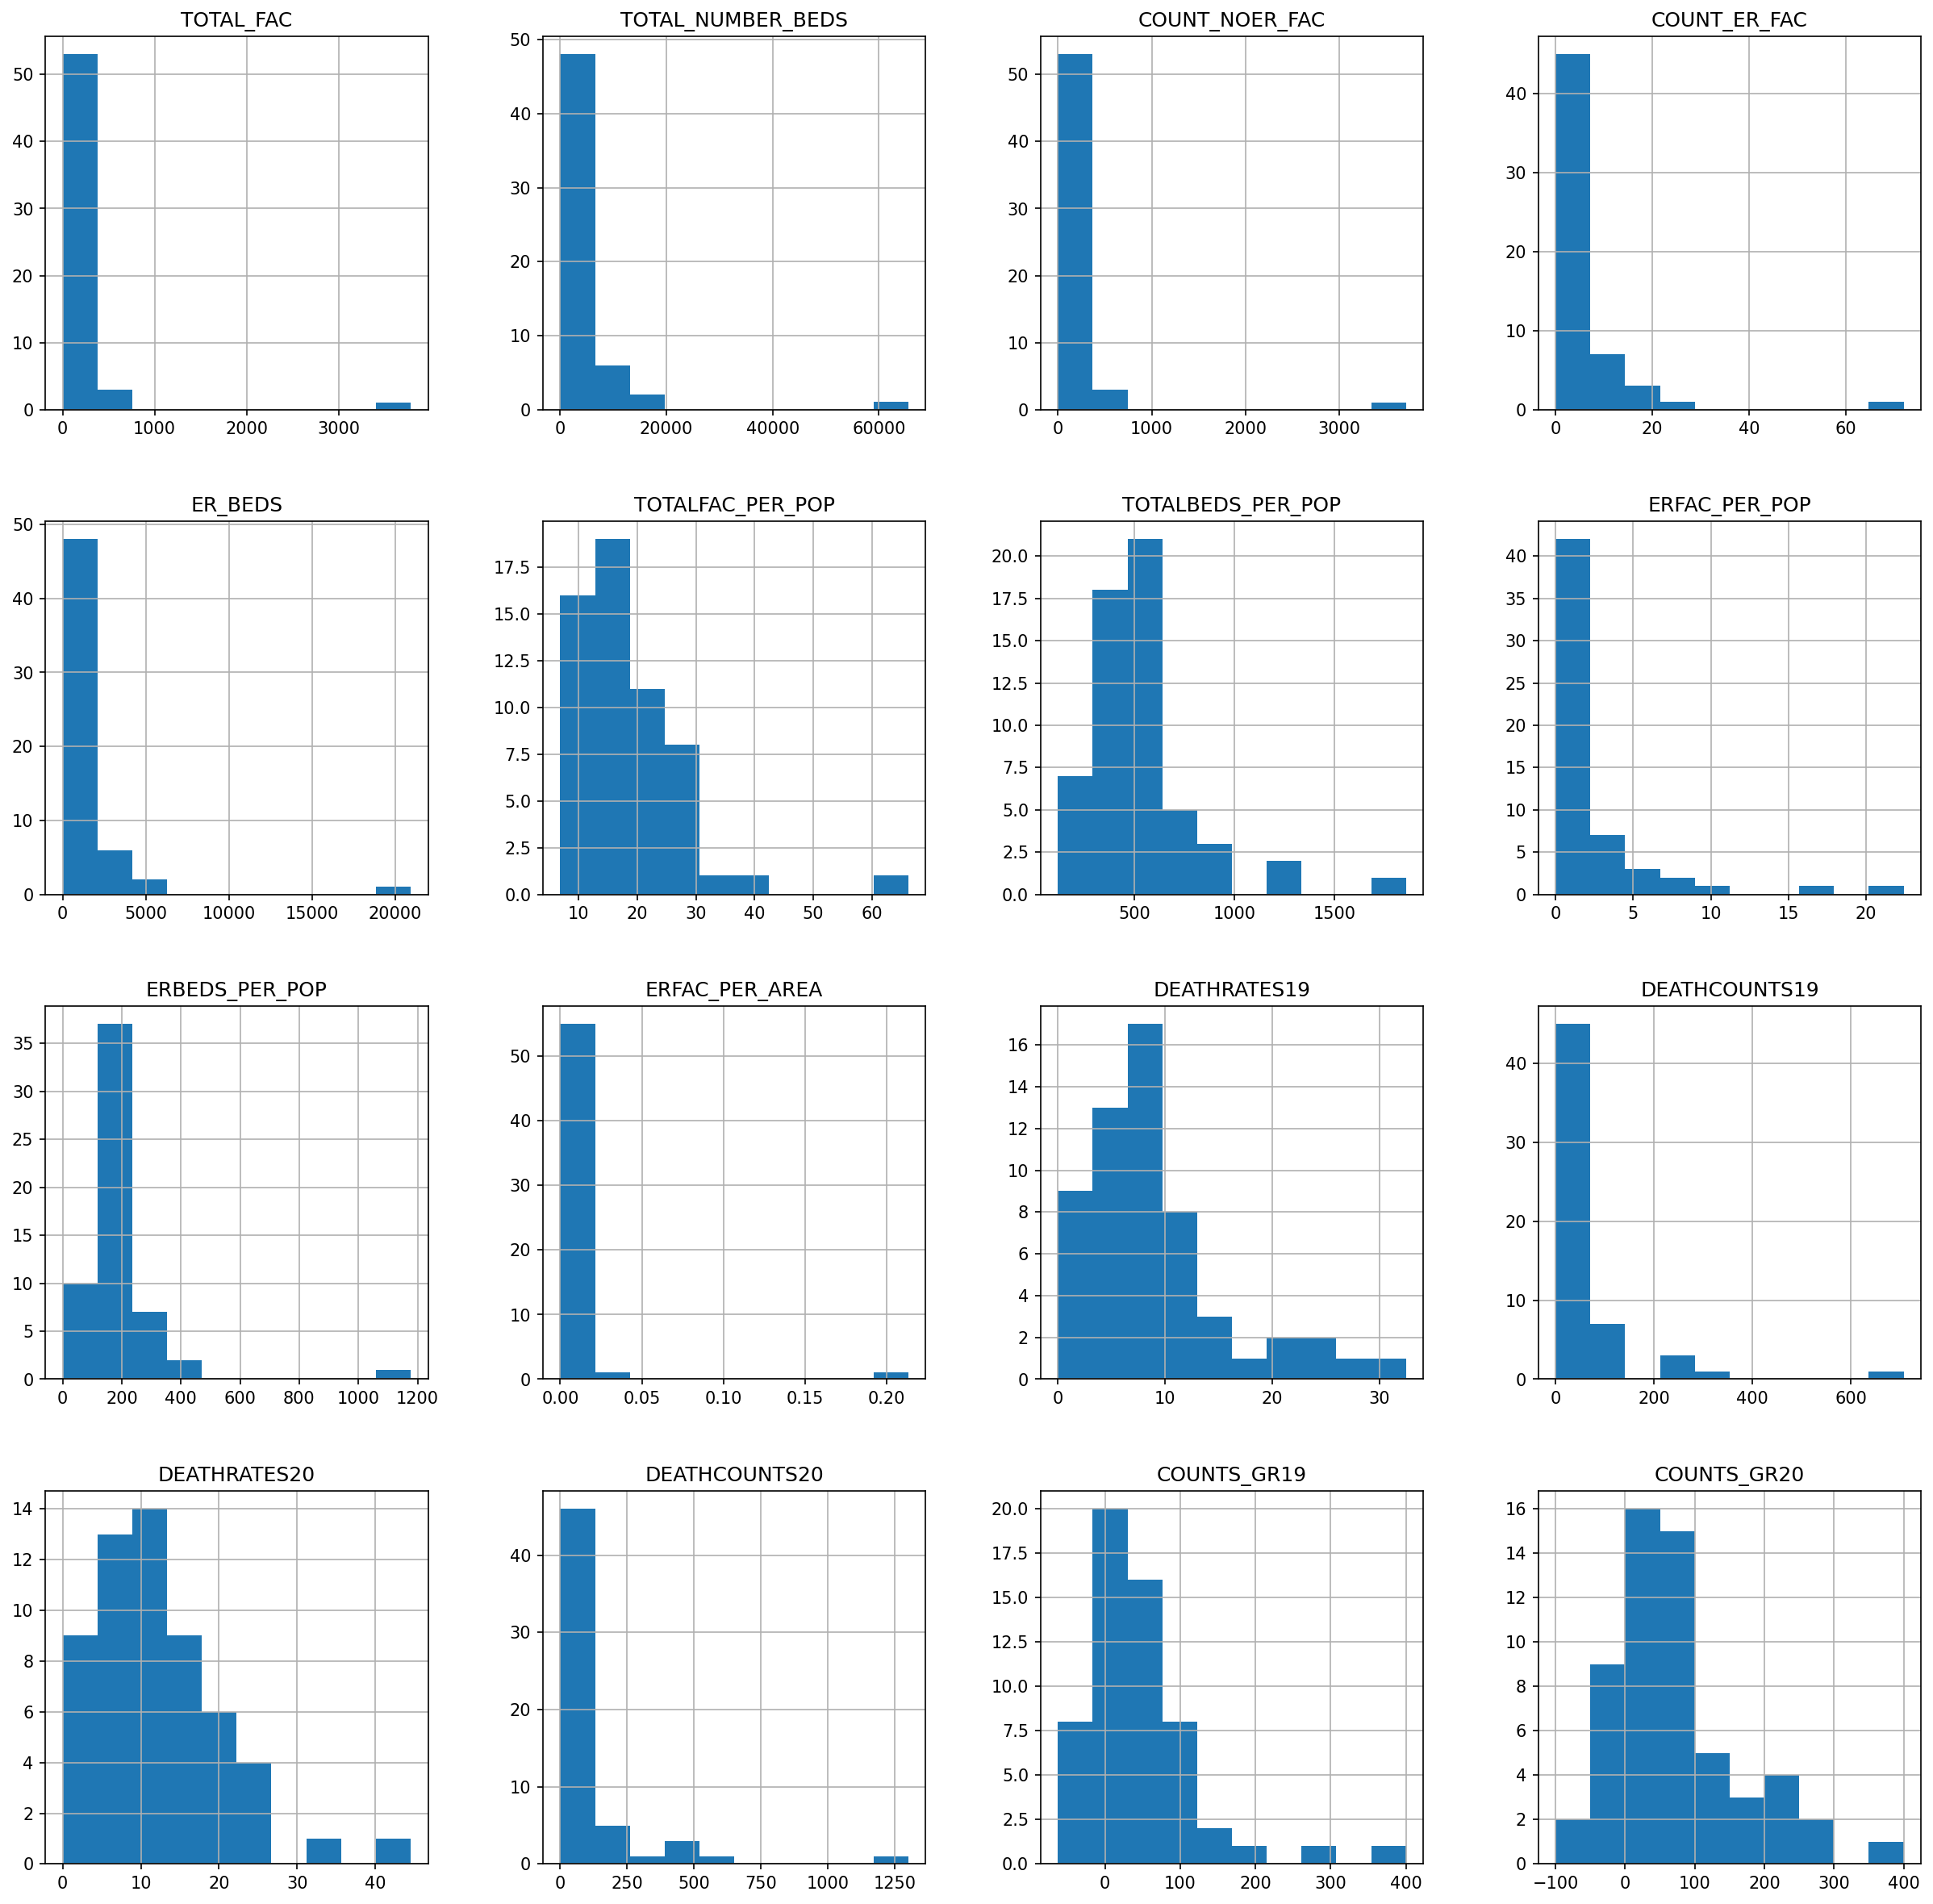

In [21]:
# Check statistical distributions of variables
hist = county_sum.hist(bins=10, figsize=(20,20))

In [22]:
# Check outliers for facility density
county_sum[county_sum["ERFAC_PER_POP"]>20]

,TOTAL_FAC,TOTAL_NUMBER_BEDS,COUNT_NOER_FAC,COUNT_ER_FAC,ER_BEDS,TOTALFAC_PER_POP,TOTALBEDS_PER_POP,ERFAC_PER_POP,ERBEDS_PER_POP,ERFAC_PER_AREA,DEATHRATES19,DEATHCOUNTS19,DEATHRATES20,DEATHCOUNTS20,COUNTS_GR19,COUNTS_GR20,BED_DENSITY_LH
COUNTY,,,,,,,,,,,,,,,,,
Modoc,2,105,0,2,105,22.413986,1176.734282,22.413986,1176.734282,0.000511,0.0,0.0,0.0,0.0,0.0,0.0,High


In [23]:
# Check outliers for Beds density
county_sum[county_sum["ERBEDS_PER_POP"]>1000]

,TOTAL_FAC,TOTAL_NUMBER_BEDS,COUNT_NOER_FAC,COUNT_ER_FAC,ER_BEDS,TOTALFAC_PER_POP,TOTALBEDS_PER_POP,ERFAC_PER_POP,ERBEDS_PER_POP,ERFAC_PER_AREA,DEATHRATES19,DEATHCOUNTS19,DEATHRATES20,DEATHCOUNTS20,COUNTS_GR19,COUNTS_GR20,BED_DENSITY_LH
COUNTY,,,,,,,,,,,,,,,,,
Modoc,2,105,0,2,105,22.413986,1176.734282,22.413986,1176.734282,0.000511,0.0,0.0,0.0,0.0,0.0,0.0,High


It seems like Modoc County has very high facility density and beds density. When searching about Modoc County, it is California's third-least populous county. Much of it is federal land (national forest, BLM, national park) [(Wiki)](https://en.wikipedia.org/wiki/Modoc_County,_California). For visualization purpose, we'd take it out when visualizing numbers on the map.

## Correlations between variables

In [24]:
corr = county_sum.corr()
corr.style.background_gradient(cmap='coolwarm')

,TOTAL_FAC,TOTAL_NUMBER_BEDS,COUNT_NOER_FAC,COUNT_ER_FAC,ER_BEDS,TOTALFAC_PER_POP,TOTALBEDS_PER_POP,ERFAC_PER_POP,ERBEDS_PER_POP,ERFAC_PER_AREA,DEATHRATES19,DEATHCOUNTS19,DEATHRATES20,DEATHCOUNTS20,COUNTS_GR19,COUNTS_GR20
TOTAL_FAC,1.000000,0.980446,0.999980,0.951899,0.962168,0.235988,0.040736,-0.129848,-0.000040,0.081567,-0.059764,0.870256,0.027946,0.891374,-0.010198,0.042815
TOTAL_NUMBER_BEDS,0.980446,1.000000,0.979430,0.981307,0.994576,0.170452,0.050589,-0.179614,-0.003232,0.132352,-0.069007,0.928373,0.049179,0.941510,-0.004304,0.051112
COUNT_NOER_FAC,0.999980,0.979430,1.000000,0.949930,0.960640,0.237649,0.041364,-0.128768,-0.000243,0.079513,-0.060338,0.867673,0.026164,0.888927,-0.010219,0.042866
COUNT_ER_FAC,0.951899,0.981307,0.949930,1.000000,0.988569,0.144530,0.008486,-0.175809,0.009473,0.175977,-0.029631,0.951796,0.111955,0.965351,-0.008776,0.038399
ER_BEDS,0.962168,0.994576,0.960640,0.988569,1.000000,0.142268,0.021880,-0.187275,0.005567,0.180441,-0.050366,0.953973,0.075406,0.962817,0.001305,0.037538
TOTALFAC_PER_POP,0.235988,0.170452,0.237649,0.144530,0.142268,1.000000,0.449373,0.165417,0.034371,-0.118091,0.123721,0.074197,-0.018280,0.098019,-0.258998,-0.058900
TOTALBEDS_PER_POP,0.040736,0.050589,0.041364,0.008486,0.021880,0.449373,1.000000,0.167135,0.365079,0.024240,-0.142991,-0.015286,-0.021566,-0.002860,-0.090401,0.076339
ERFAC_PER_POP,-0.129848,-0.179614,-0.128768,-0.175809,-0.187275,0.165417,0.167135,1.000000,0.792864,-0.091328,0.100376,-0.214562,-0.166558,-0.203096,-0.187143,-0.259765
ERBEDS_PER_POP,-0.000040,-0.003232,-0.000243,0.009473,0.005567,0.034371,0.365079,0.792864,1.000000,0.094762,0.003864,0.000788,-0.112610,0.000317,-0.063276,-0.202411
ERFAC_PER_AREA,0.081567,0.132352,0.079513,0.175977,0.180441,-0.118091,0.024240,-0.091328,0.094762,1.000000,0.339478,0.373572,0.511035,0.338344,0.085067,-0.010875


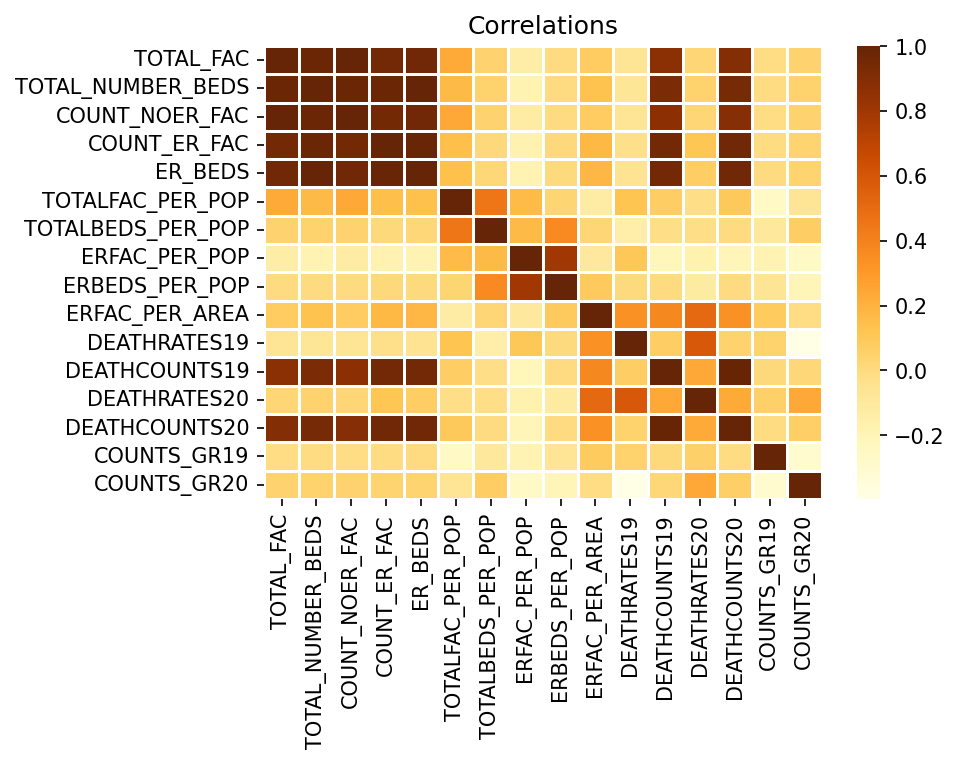

In [25]:
# create correlation heatmap
hm = sns.heatmap(county_sum.corr(), annot = False, linewidths=.5, cmap="YlOrBr")
hm.set(title="Correlations")
plt.show()

Correlations with Deaths Counts in 2019 and 2020:
- Number of facility (ER or not) and total number of beds (ER or not) have strong positive correlations with death counts in both 2019 and 2020. It means that the bigger counties have more deaths.
- Number of ER facility per area seems to have positive correlations with death counts.

Correlations with Death Rates in 2019 and 2020:
- Death rates in 2019 and 2020 actually have relatively strong correlation with each other (>0.5). It means that similar death rate trends happen within a county.
- Number of ER facility per area seems to have positive correlations with death rates.

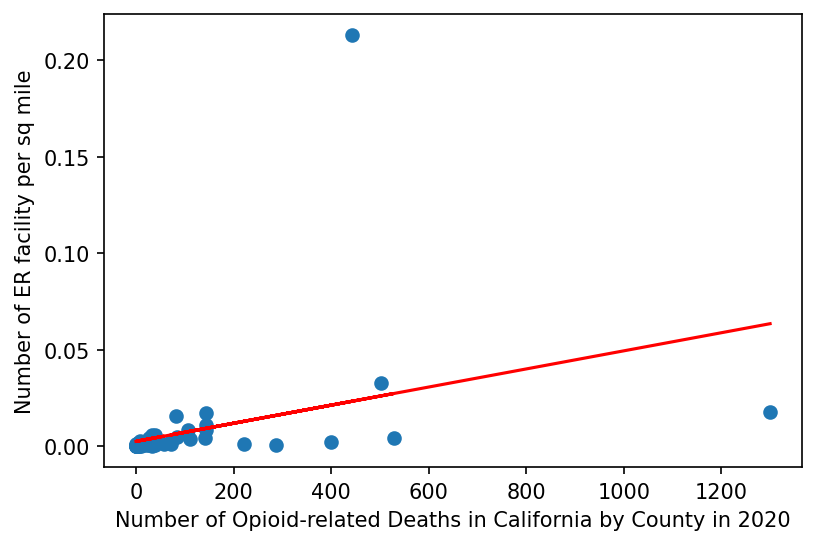

In [36]:
# Explore the correlation between ER facility per area and death counts/rates
x= county_sum["DEATHCOUNTS20"]
y = county_sum["ERFAC_PER_AREA"]
plt.scatter(x,y)
plt.xlabel("Number of Opioid-related Deaths in California by County in 2020")
plt.ylabel("Number of ER facility per sq mile")

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color="red")
plt.show()

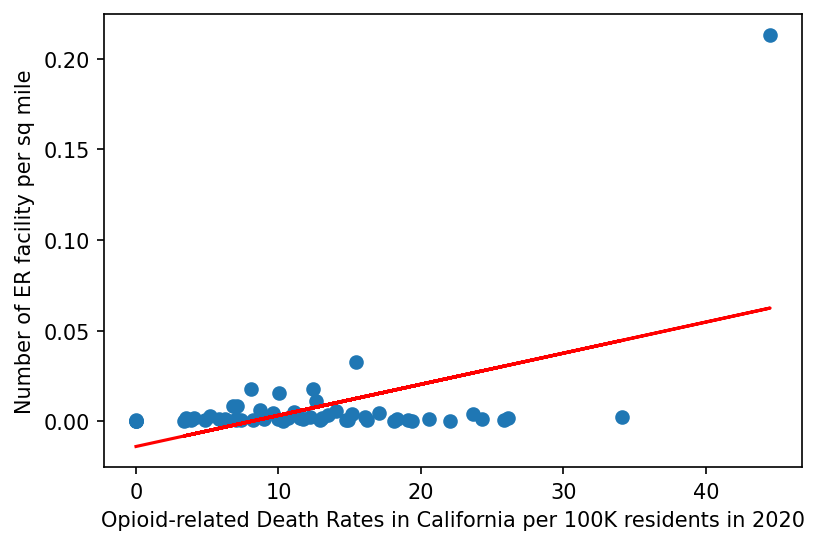

In [37]:
# Explore the correlation between ER facility per area and death counts/rates
x= county_sum["DEATHRATES20"]
y = county_sum["ERFAC_PER_AREA"]
plt.scatter(x,y)
plt.xlabel("Opioid-related Death Rates in California per 100K residents in 2020")
plt.ylabel("Number of ER facility per sq mile")

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color="red")
plt.show()

## Geomapping variables on a map

For this, we need shapefile of California County, which is acquired from [opendatasoft](https://public.opendatasoft.com/explore/dataset/us-county-boundaries/export/?disjunctive.statefp&disjunctive.countyfp&disjunctive.name&disjunctive.namelsad&disjunctive.stusab&disjunctive.state_name&refine.stusab=CA).

In [38]:
# Import library and load shapefile
import geopandas as gpd
map_df = gpd.read_file("/home/thuy/Documents/Data Science/02. DS4A/Capstone_teamrepo/DS4A-TeamProject/data/US County Data/us-county-boundaries.shp")

map_df.head()

,statefp,countyfp,countyns,geoid,name,namelsad,stusab,lsad,classfp,mtfcc,...,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,state_name,countyfp_no,geometry
0,06,031,00277280,06031,Kings,Kings County,CA,06,H1,G4020,...,25260,None,A,3.600884e+09,3162664.0,+36.0724780,-119.8155301,California,31,"POLYGON ((-119.95892 36.25547, -119.95893 36.2..."
1,06,069,00277299,06069,San Benito,San Benito County,CA,06,H1,G4020,...,41940,None,A,3.596591e+09,4719300.0,+36.6116507,-121.0858108,California,69,"POLYGON ((-121.48300 36.76505, -121.48351 36.7..."
2,06,019,00277274,06019,Fresno,Fresno County,CA,06,H1,G4020,...,23420,None,A,1.543214e+10,136609898.0,+36.7610058,-119.6550193,California,19,"POLYGON ((-120.42219 36.84014, -120.42172 36.8..."
3,06,063,00277296,06063,Plumas,Plumas County,CA,06,H1,G4020,...,None,None,A,6.612401e+09,156387636.0,+39.9922953,-120.8243709,California,63,"POLYGON ((-121.36701 40.07767, -121.36688 40.0..."
4,06,027,01804637,06027,Inyo,Inyo County,CA,06,H1,G4020,...,None,None,A,2.641068e+10,76915743.0,+36.5619770,-117.4039269,California,27,"POLYGON ((-118.33758 36.65480, -118.33773 36.6..."


<AxesSubplot:>

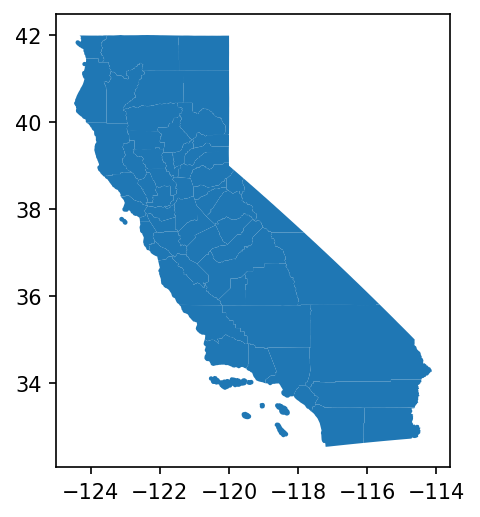

In [39]:
# Check if map works fine
map_df.plot()

In [41]:
# Merge geodata with county data
merged_map = map_df.set_index('name').join(county_sum)
merged_map.head()

,statefp,countyfp,countyns,geoid,namelsad,stusab,lsad,classfp,mtfcc,csafp,...,ERFAC_PER_POP,ERBEDS_PER_POP,ERFAC_PER_AREA,DEATHRATES19,DEATHCOUNTS19,DEATHRATES20,DEATHCOUNTS20,COUNTS_GR19,COUNTS_GR20,BED_DENSITY_LH
name,,,,,,,,,,,,,,,,,,,,,
Kings,06,031,00277280,06031,Kings County,CA,06,H1,G4020,260,...,0.640796,110.857641,0.000720,1.06,2.0,7.36,10.0,-50.000000,400.000000,High
San Benito,06,069,00277299,06069,San Benito County,CA,06,H1,G4020,488,...,1.526951,125.209956,0.000720,7.98,5.0,6.33,4.0,150.000000,-20.000000,Low
Fresno,06,019,00277274,06019,Fresno County,CA,06,H1,G4020,260,...,0.690744,170.909809,0.001175,4.86,48.0,7.01,71.0,37.142857,47.916667,High
Plumas,06,063,00277296,06063,Plumas County,CA,06,H1,G4020,None,...,15.840329,411.848566,0.001175,11.77,2.0,6.28,1.0,0.000000,-50.000000,High
Inyo,06,027,01804637,06027,Inyo County,CA,06,H1,G4020,None,...,10.973937,340.192044,0.000196,14.47,2.0,22.03,3.0,-33.333333,50.000000,High


In [45]:
# Remove Modoc when visualizing
merged_map = merged_map.reset_index()
merged_map_viz = merged_map[merged_map["name"] != "Modoc"]

In [46]:
# Create a function to map the variable
def california_map(variable,maptitle):
    vmin = merged_map_viz[variable].min()
    vmax = merged_map_viz[variable].max()
    fig, ax = plt.subplots(1, figsize=(10,6))
    merged_map_viz.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    ax.set_title(maptitle)

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # empty array for the data range
    sm._A = []
    
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)

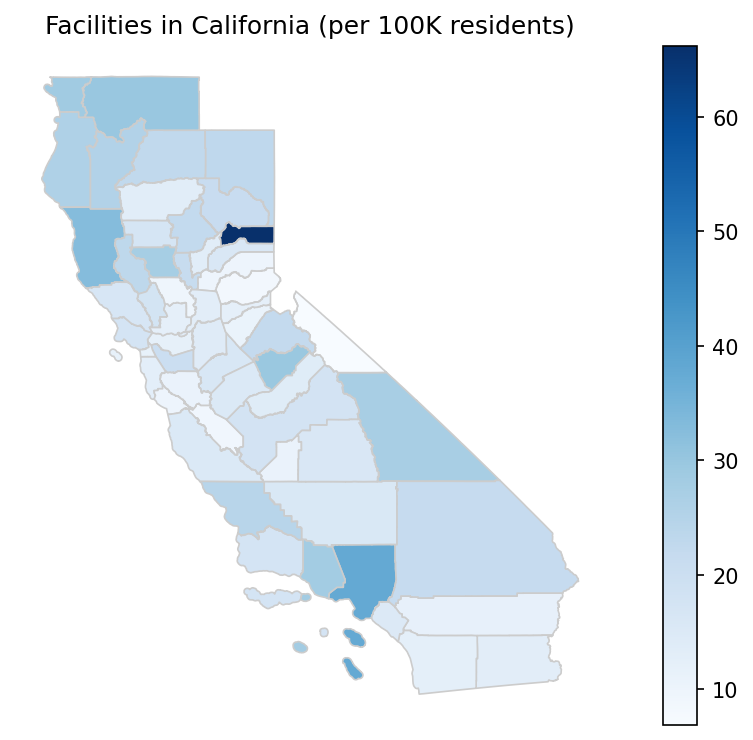

In [47]:
california_map('TOTALFAC_PER_POP','Facilities in California (per 100K residents)')

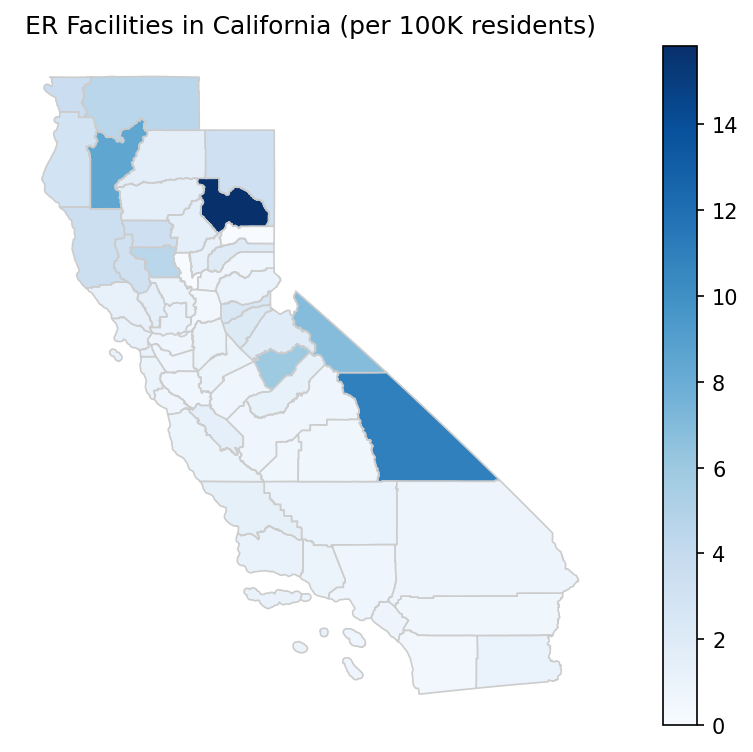

In [48]:
california_map('ERFAC_PER_POP','ER Facilities in California (per 100K residents)')

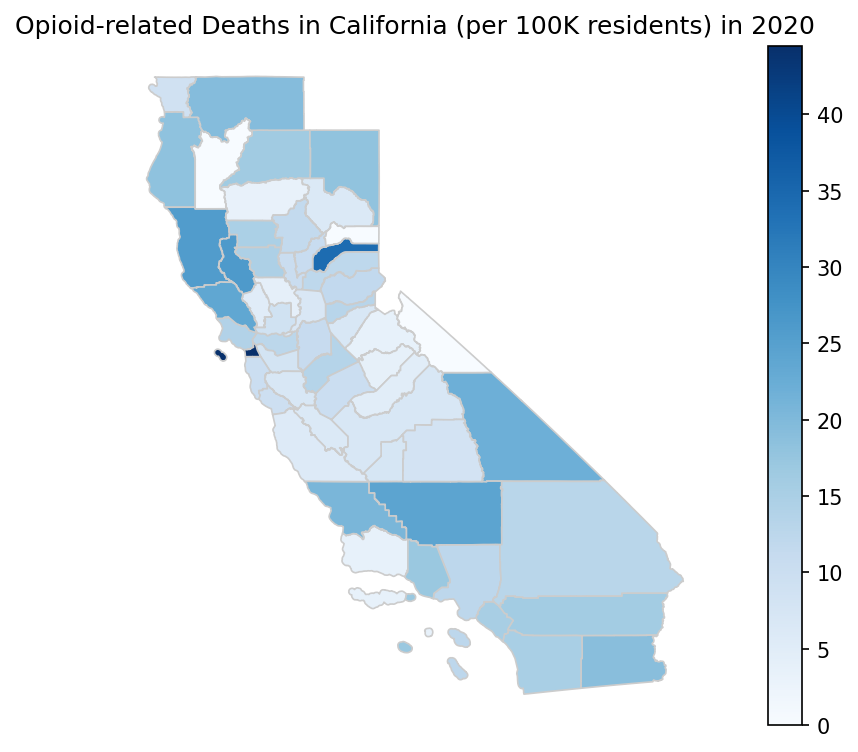

In [50]:
california_map('DEATHRATES20','Opioid-related Deaths in California (per 100K residents) in 2020')

<AxesSubplot:ylabel='COUNTY'>

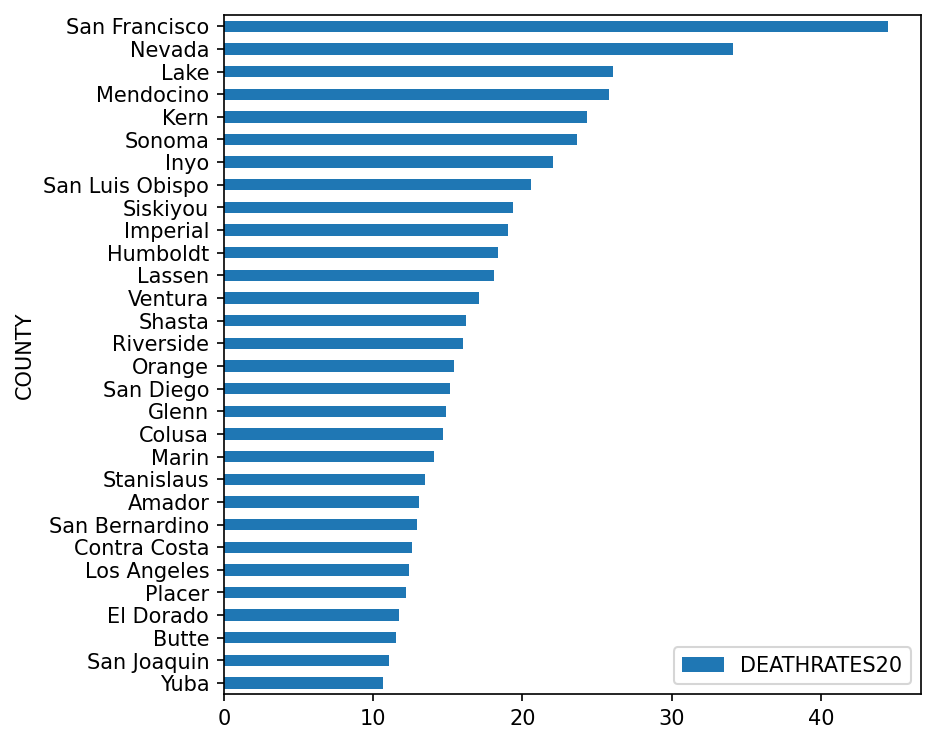

In [56]:
topdeathrate20 = county_sum.reset_index().sort_values(by="DEATHRATES20", ascending=True).tail(30)
topdeathrate20.plot(x="COUNTY",y="DEATHRATES20",kind='barh',figsize=(6,6))

<AxesSubplot:ylabel='COUNTY'>

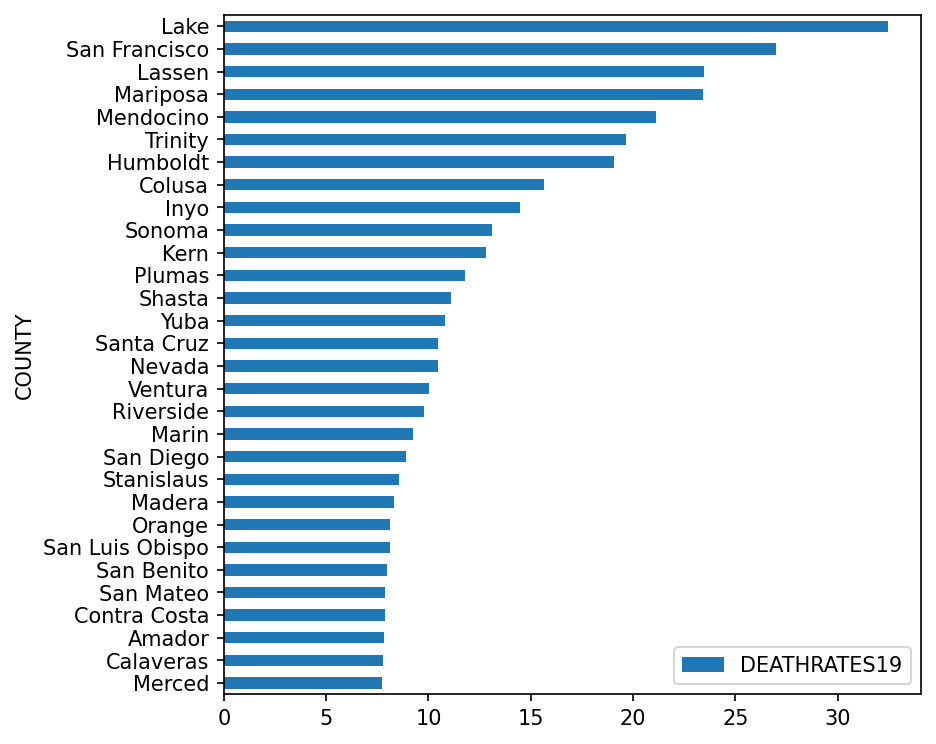

In [58]:
topdeathrate19 = county_sum.reset_index().sort_values(by="DEATHRATES19", ascending=True).tail(30)
topdeathrate19.plot(x="COUNTY",y="DEATHRATES19",kind='barh',figsize=(6,6))

<AxesSubplot:ylabel='COUNTY'>

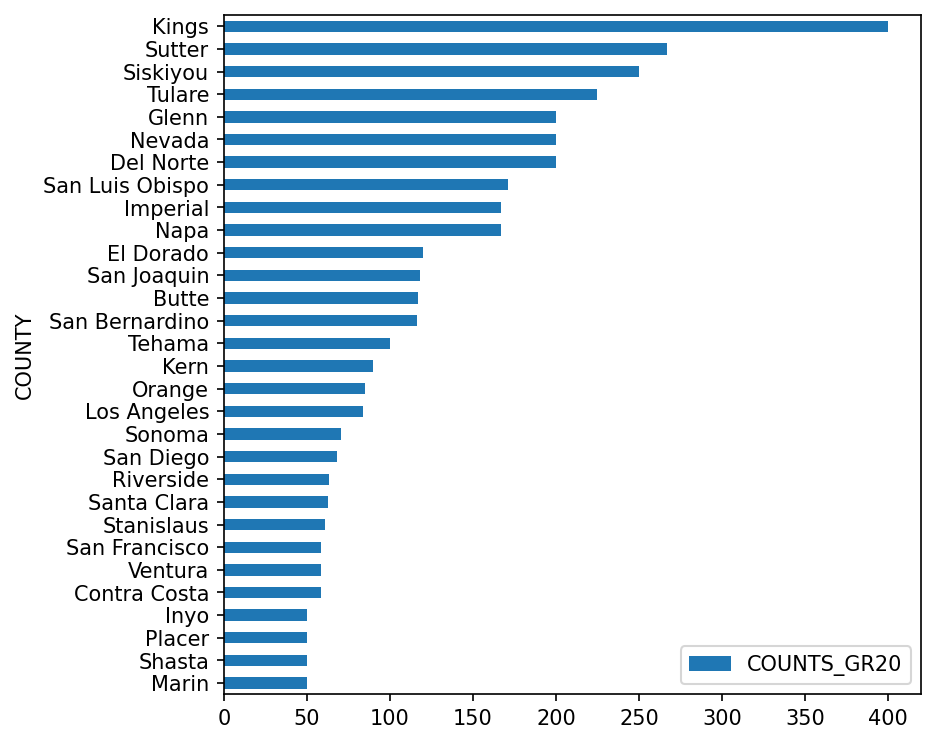

In [59]:
topgrowed2020 = county_sum.reset_index().sort_values(by="COUNTS_GR20", ascending=True).tail(30)
topgrowed2020.plot(x="COUNTY",y="COUNTS_GR20",kind='barh',figsize=(6,6))